# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
df = pd.read_csv("Profissão Cientista de Dados M10 A1.csv.csv")
df.head(3)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98


In [11]:
df['data_ref'] = pd.to_datetime( df['data_ref'] )

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [46]:
def gera_grafico_discretas(col_name, hline=[]):
    

    tab = pd.crosstab(index = df['data_ref'], columns = df[col_name], normalize='index')
    ax = tab.plot.bar(stacked = True, figsize=[15,5])
    ax.set_title(f"Proporção dos valores da variável '{col_name}' ao decorrer dos meses.")
    labels_x = df['data_ref'].dt.strftime("%m/%Y").unique()
    ax.set_xticklabels(labels_x, rotation=10)
    ax.set_xlabel("")
    for y in hline:
        ax.axhline(y=y, color = 'black', linestyle = ':')
    

    plt.show()

Proporção ao decorrer dos meses: homens X mulheres: 

Não houve mudança significativa na variável sexo no decorrer do tempo.
Pode se notar que a proporção de cada sexo não variaram nem 10% durante o período.

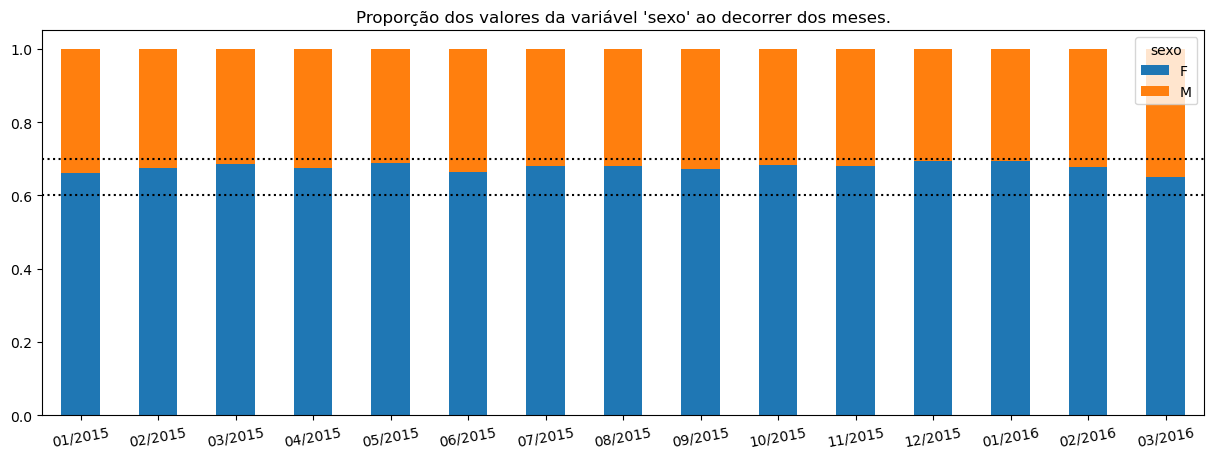

In [48]:
gera_grafico_discretas(col_name = 'sexo', hline = [0.6, 0.7])

Proporção ao decorrer dos meses: possuem_veículo X não_possuem

Para a variável "posse_de_veiculo", também não houve uma mudança significativa com o passar do tempo.
O mês em que mais mudou, foi um aumento de cerca de apenas 5% e logo após voltou a cair para a proporção inicial.

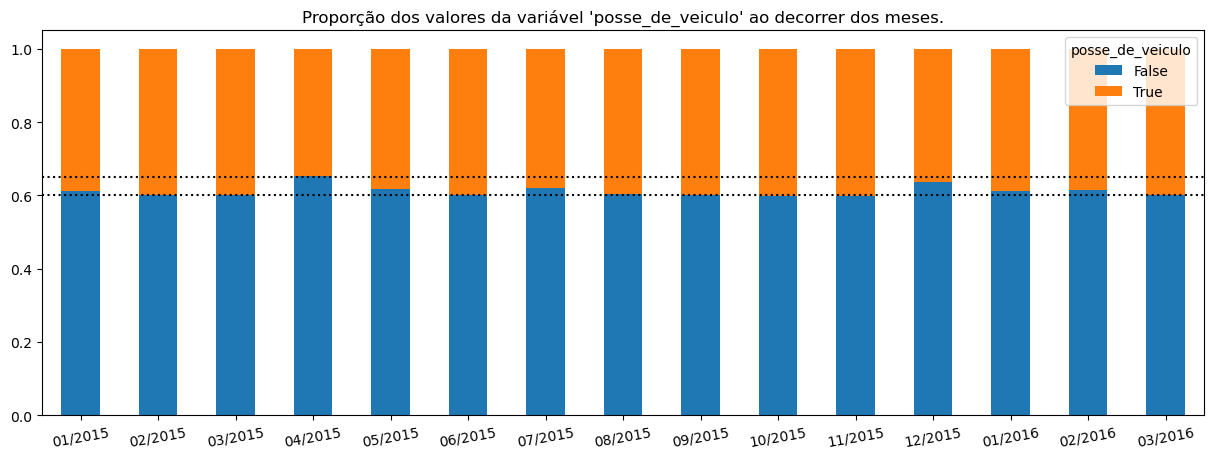

In [51]:
gera_grafico_discretas('posse_de_veiculo', hline = [0.6, 0.65])

Proporção ao decorrer dos meses: possuem_imovel X não_possuem

A variável "posse_de_imovel" também não teve uma mudança significativa na estabilidade com o passar do tempo.
O mês em que mais variou, foi cerca de apenas 5%.

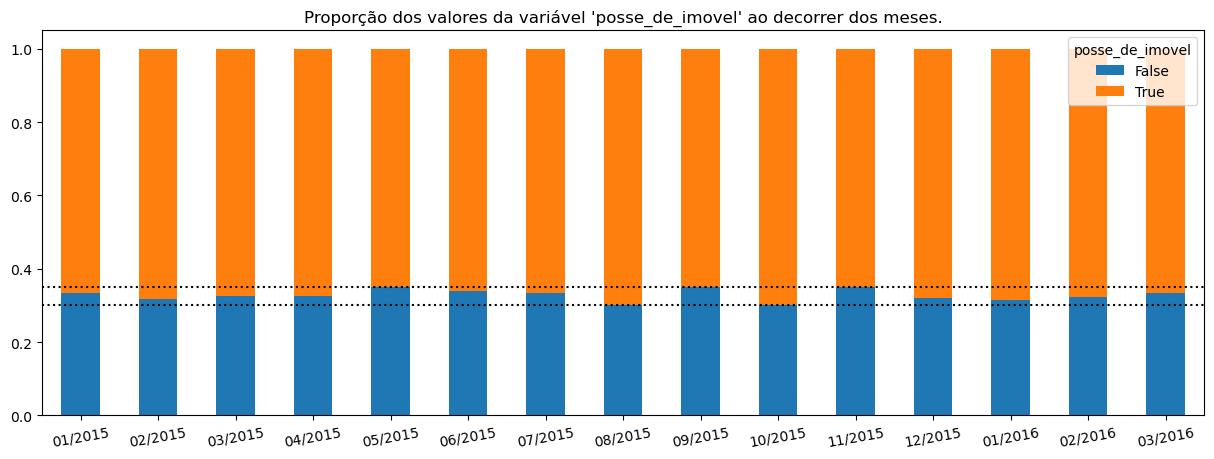

In [53]:
gera_grafico_discretas('posse_de_imovel', hline = [0.3, 0.35])

Proporção ao decorrer dos meses por "tipo_renda"

Não houve nenhum mudança significativa na estabilidade da variavel "tipo_renda", todas as proporções se mantiveram com poucas alterações durante todo o período observado.

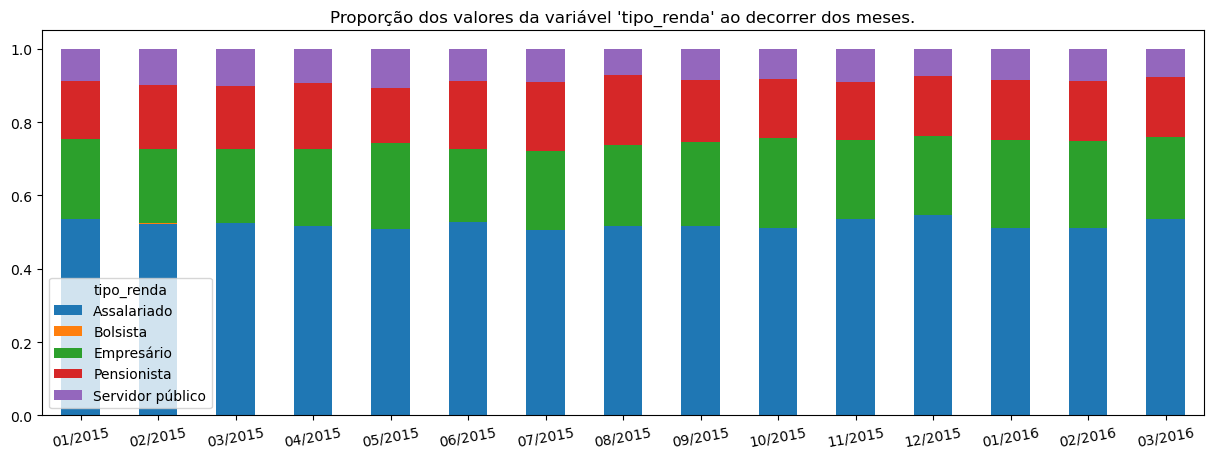

In [55]:
gera_grafico_discretas('tipo_renda')

Proporção ao decorrer dos meses por "estado_civil"

Não houve mudanças significativas na estabilidade da variavel "estado_civil" no período observado.
Todos os dominíos da variável permaneceram com poucas alterações em suas proporções.

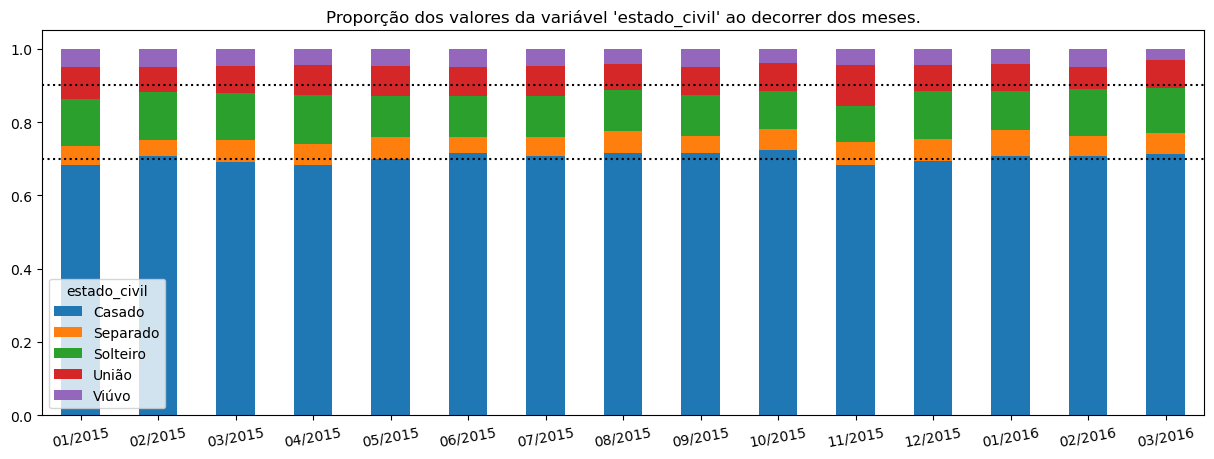

In [58]:
gera_grafico_discretas('estado_civil', hline = [0.7, 0.9])

Proporção ao decorrer dos meses por "tipo_residencia"

Variável "tipo_residencia" também sem mudanças siginificativas, em todo o período o domínio "casa" ocupou mais de 90% do total.

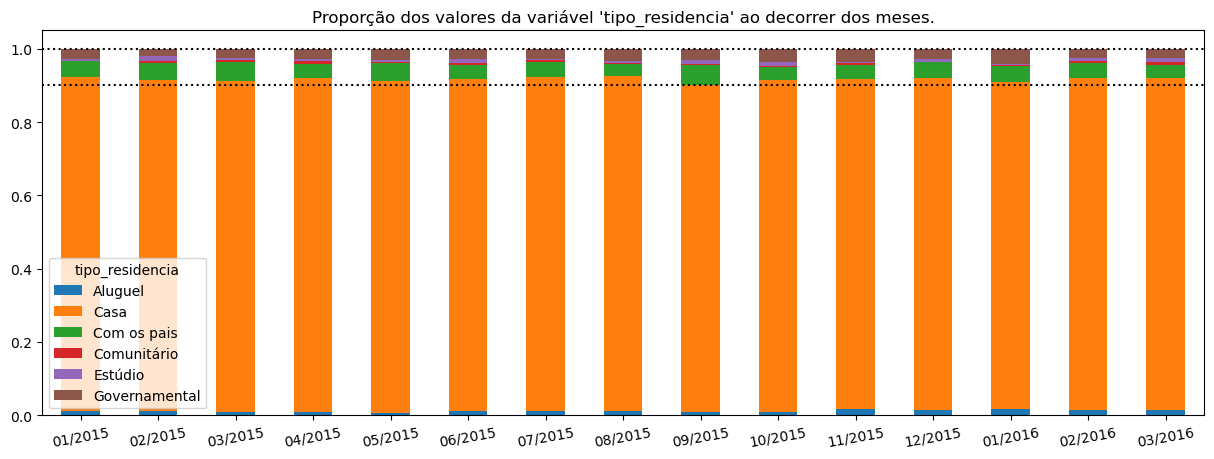

In [60]:
gera_grafico_discretas('tipo_residencia', hline = [0.9, 1])

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [62]:
def gera_grafico_continuas(col_name):
    
    

    plt.figure(figsize=[15,5])
    ax = sns.pointplot(data = df, 
                       x = 'data_ref', 
                       y = col_name, 
                       errorbar = ('ci', 90))
    ax.set_title(f"Média da variável '{col_name}' ao decorrer dos meses")
    labels_x = df['data_ref'].dt.strftime("%m/%Y").unique()
    ax.set_xticklabels(labels_x)
    mediana = df.groupby('data_ref')[col_name].mean().median()
    ax.axhline(y = mediana, color = 'red', linestyle = '--')
    ax.set_xlabel("")
    plt.show()
    

C:\Users\Maria Fernanda\AppData\Local\Temp\ipykernel_3824\3443082070.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_x)


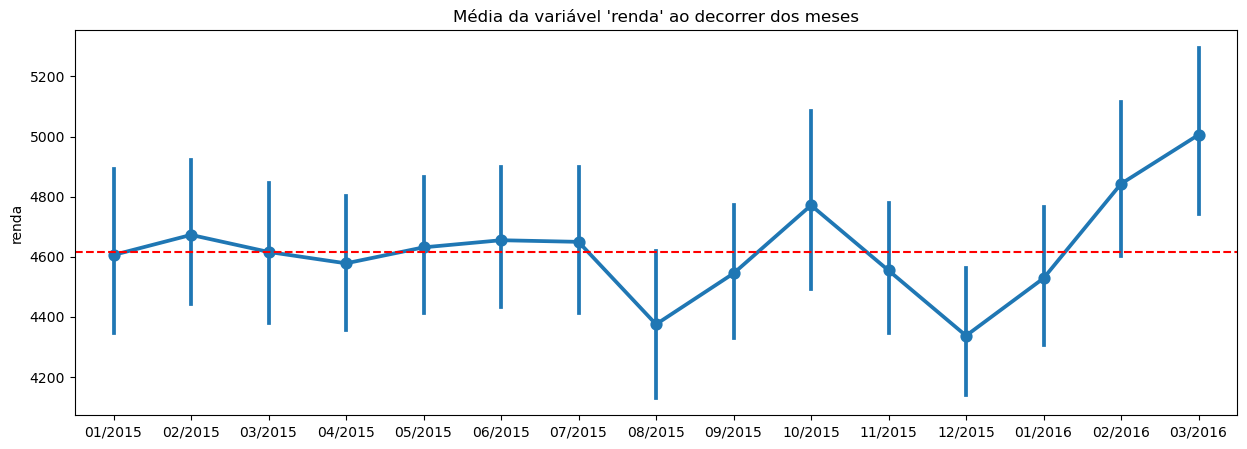

In [64]:
gera_grafico_continuas('renda')

Gráfico da renda média média ao decorrer dos meses
Com um intervalo de confiança de 90%, não é possível afirmar que a variável teve uma mudança significativa na estabilidade.

C:\Users\Maria Fernanda\AppData\Local\Temp\ipykernel_3824\3443082070.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_x)


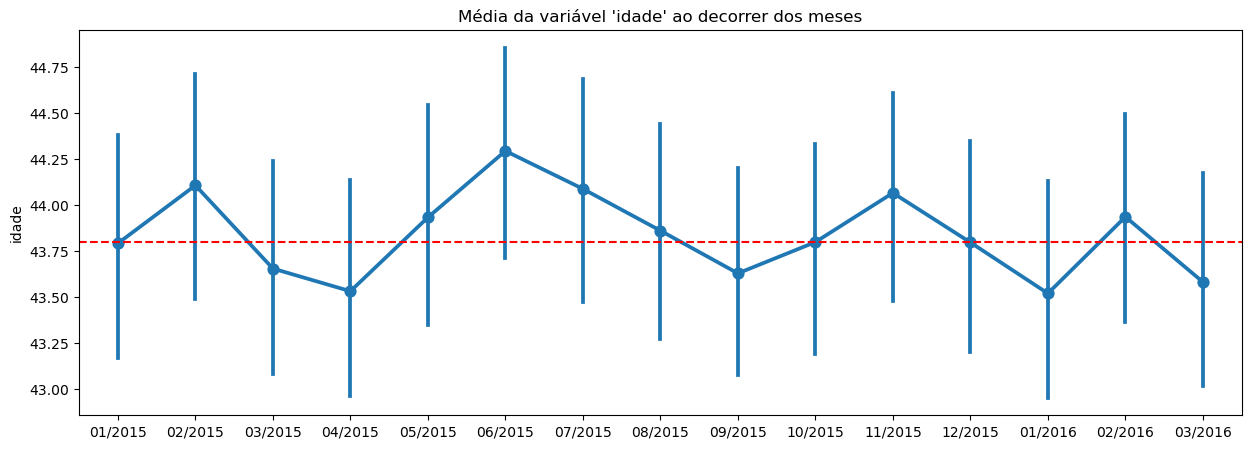

In [66]:
gera_grafico_continuas('idade')

Gráfico da idade média ao decorrer dos meses
Com um intervalo de confiança de 90%, não é possível afirmar que a variável teve uma mudança significativa na estabilidade.

C:\Users\Maria Fernanda\AppData\Local\Temp\ipykernel_3824\3443082070.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_x)


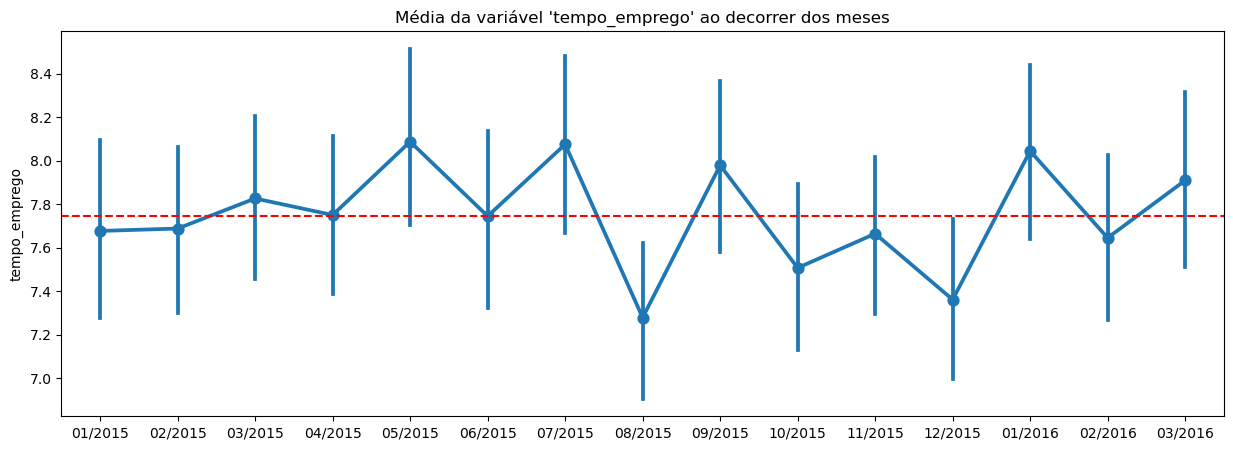

In [68]:
gera_grafico_continuas('tempo_emprego')

Gráfico do tempo médio de emprego ao decorrer dos meses
Com um intervalo de confiança de 90%, não é possível afirmar que a variável teve uma mudança significativa na estabilidade.

C:\Users\Maria Fernanda\AppData\Local\Temp\ipykernel_3824\3443082070.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_x)


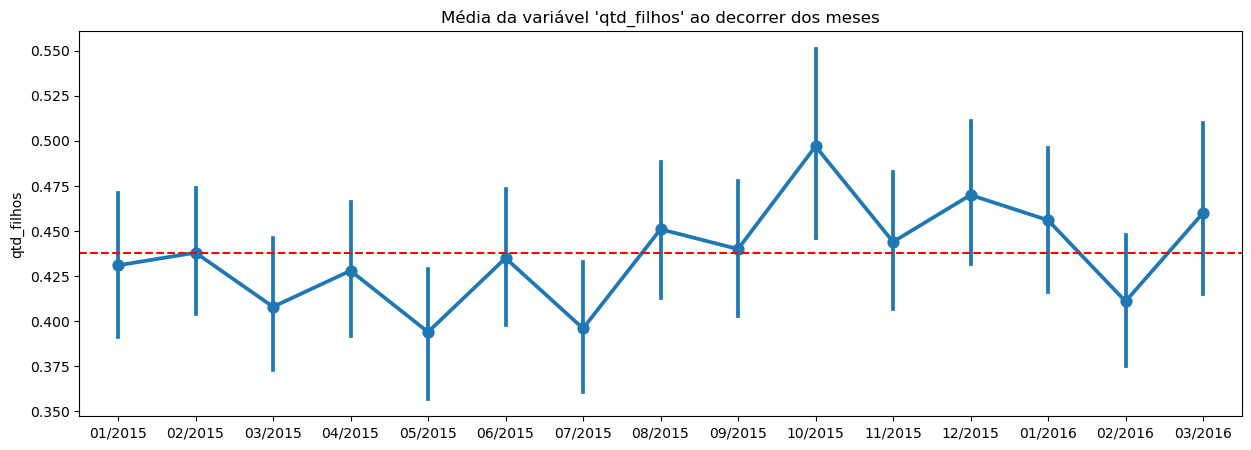

In [70]:
gera_grafico_continuas('qtd_filhos')

Gráfico da quantidade média de filhos ao decorrer dos meses
Com um intervalo de confiança de 90%, não é possível afirmar que a variável teve uma mudança significativa na estabilidade.

C:\Users\Maria Fernanda\AppData\Local\Temp\ipykernel_3824\3443082070.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_x)


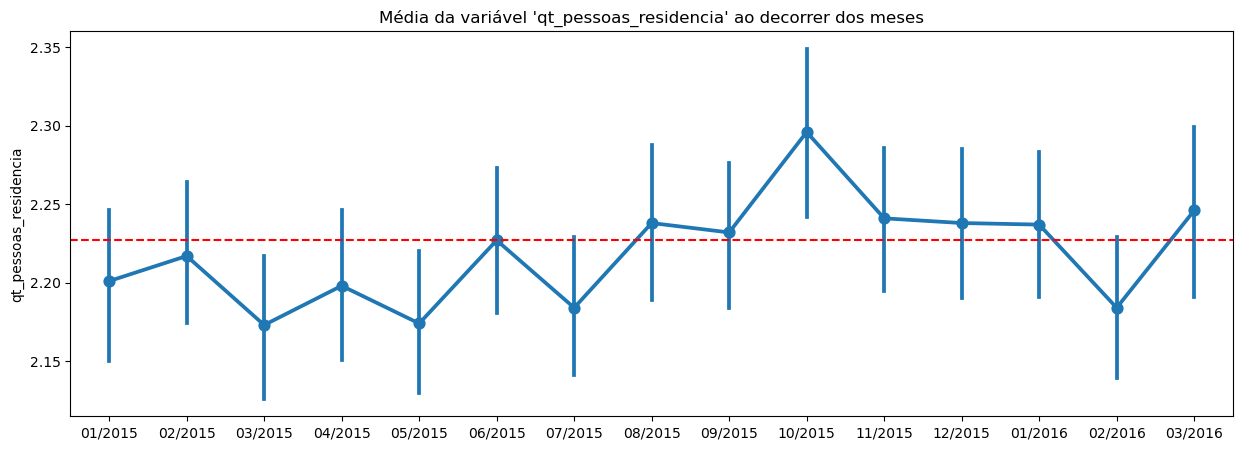

In [72]:
gera_grafico_continuas('qt_pessoas_residencia')

Gráfico da quantidade média de pessoas por residência ao decorrer dos meses
Com um intervalo de confiança de 90%, não é possível afirmar que a variável teve uma mudança significativa na estabilidade.